# Perform Order Date Time Analysis

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#IMPORTING DATA
maret_basket_analysis = pd.read_csv (r'H:\intern_lovelocal\ML_Project\store_product_orders_data_modified.csv')
maret_basket_analysis= maret_basket_analysis[['order_id','product_name','order_date']] #Taking required columns
maret_basket_analysis.drop_duplicates(['order_id','product_name','order_date'],keep= 'last',inplace= True) #Removing duplicates products with in the transaction
maret_basket_analysis.reset_index(drop=True, inplace= True) #Resetting the Index 
#maret_basket_analysis['product_name'] = maret_basket_analysis['product_name'].str.strip() #Removing unnecessary spaces

In [3]:
maret_basket_analysis.head()

,order_id,product_name,order_date
0,64890091,Gemini Refined Sunflower Oil Jar (5 L),2019-12-01 02:58:11.242573
1,64890091,Aashirvaad Superior MP Atta (1 kg),2019-12-01 02:58:11.242573
2,31384697,Mix Dryfruits 500 Gm,2019-12-01 07:06:46.397832
3,89309898,McCain Smiles (1.25 kg),2019-12-01 06:33:10.835154
4,89309898,Svt Amla Fizz 300Ml,2019-12-01 06:33:10.835154


In [4]:
type(maret_basket_analysis['order_date'][0])

str

In [11]:
maret_basket_analysis['order_date']= pd.to_datetime(maret_basket_analysis['order_date'])

In [12]:
maret_basket_analysis['order_date'] = maret_basket_analysis['order_date'].astype('datetime64[s]')

In [29]:
maret_basket_analysis['day_of_week'] = maret_basket_analysis['order_date'].dt.weekday_name

In [13]:
maret_basket_analysis['new_date'] = [d.date() for d in maret_basket_analysis['order_date']]
maret_basket_analysis['new_time'] = [d.time() for d in maret_basket_analysis['order_date']]

In [14]:
maret_basket_analysis.head()

,order_id,product_name,order_date,new_date,new_time
0,64890091,Gemini Refined Sunflower Oil Jar (5 L),2019-12-01 02:58:11,2019-12-01,02:58:11
1,64890091,Aashirvaad Superior MP Atta (1 kg),2019-12-01 02:58:11,2019-12-01,02:58:11
2,31384697,Mix Dryfruits 500 Gm,2019-12-01 07:06:46,2019-12-01,07:06:46
3,89309898,McCain Smiles (1.25 kg),2019-12-01 06:33:10,2019-12-01,06:33:10
4,89309898,Svt Amla Fizz 300Ml,2019-12-01 06:33:10,2019-12-01,06:33:10


In [16]:
maret_basket_analysis['hour'] = pd.to_datetime(maret_basket_analysis['new_time'], format='%H:%M:%S').dt.hour

In [30]:
maret_basket_analysis.head()

,order_id,product_name,order_date,new_date,new_time,hour,day_of_week
0,64890091,Gemini Refined Sunflower Oil Jar (5 L),2019-12-01 02:58:11,2019-12-01,02:58:11,2,Sunday
1,64890091,Aashirvaad Superior MP Atta (1 kg),2019-12-01 02:58:11,2019-12-01,02:58:11,2,Sunday
2,31384697,Mix Dryfruits 500 Gm,2019-12-01 07:06:46,2019-12-01,07:06:46,7,Sunday
3,89309898,McCain Smiles (1.25 kg),2019-12-01 06:33:10,2019-12-01,06:33:10,6,Sunday
4,89309898,Svt Amla Fizz 300Ml,2019-12-01 06:33:10,2019-12-01,06:33:10,6,Sunday


# Order Date Time Analysis

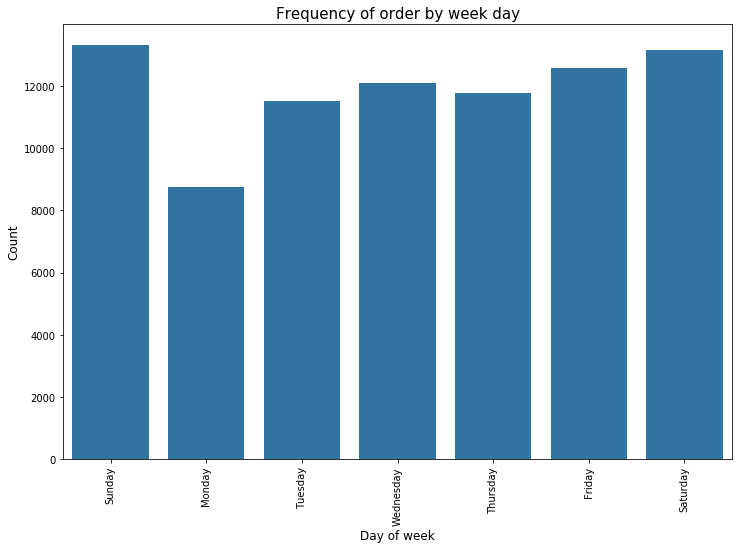

In [37]:
plt.figure(figsize=(12,8))
sns.countplot(x="day_of_week", data=maret_basket_analysis[['order_id','day_of_week']], color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

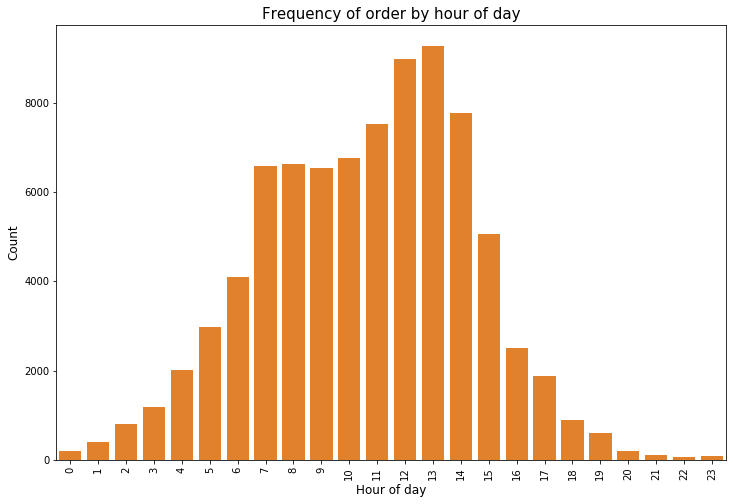

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x="hour", data=maret_basket_analysis[['order_id','hour']], color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

#So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution